In [115]:
import math
from symtable import Symbol
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as sym
from scipy.optimize import curve_fit
from sympy import symbols

# Homework 0
## Use numerical integration to find the area of a circle.

1. Consider a circle $x^2 + y^2 = r^2$. Plot the circle with radius $r = 1$.

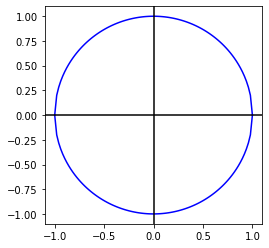

In [116]:
r = 1
numPoints = 100

x = np.linspace(-r, r, numPoints)

def circle(r, x):
    return math.sqrt(r ** 2 - x ** 2)
vectCircle = np.vectorize(circle)       # Somehow looks more like an oval than a circle...

y = vectCircle(r, x)

plt.plot(x, y, "b")                     # Plots positive values of square root
plt.plot(x, -y, "b")                    # Plots negative values of square root
plt.gca().set_aspect("equal")           # More or less copied from Sam Bishop in class; just makes it look more circular
plt.axhline(y = 0, color = "black")     # Plots x axis
plt.axvline(x = 0, color = "black")     # Plots y axis
plt.show()

2. Use Riemann sums to calculate the area of the circle. (Use a sufficiently large number of partitions.)

In [117]:
areaSum = 0
numToPartition = 100                      # Obtaining the number and width of rectangles to partition circle of
partitionValue = r / numToPartition       # This is only looking at one quarter of the circle
i = 0                                     # Therefore will need to be quadrupled at the end for the total area
arrayStart = numPoints // 2               # Grabs first positive value index of x array
xValue = x[arrayStart]                    # Gets the value itself from aforementioned index

for i in range(numToPartition - 1):
    areaRect = circle(r, xValue) * partitionValue   # Gets area of next rectangle
    areaSum += areaRect                             # Adds area of rectangle to total sum
    xValue += partitionValue                        # Gets next x value to evaluate y at

areaSum *= 4
print(areaSum)

3.1200544843981084


3. Define a python function to calculate the circular area for any given radius $r$.

In [118]:
# I think I already did this since I try to not hardcode anything
def area(r, numToPartition = 100, numPoints = 100):
    x = np.linspace(-r, r, numPoints)

    areaSum = 0
    partitionValue = r / numToPartition       # This is only looking at one quarter of the circle
    i = 0                                     # Therefore will need to be quadrupled at the end for the total area
    arrayStart = numPoints // 2               # Grabs first positive value index of x array
    xValue = x[arrayStart]                    # Gets the value itself from aforementioned index

    for i in range(numToPartition - 1):
        areaRect = circle(r, xValue) * partitionValue   # Gets area of next rectangle
        areaSum += areaRect                             # Adds area of rectangle to total sum
        xValue += partitionValue                        # Gets next x value to evaluate y at

    areaSum *= 4
    return areaSum

4. Plot the area with respect to the radius. Do you recover the formula $A = \pi r^2$?

Line of best fit:  3.120054484398108  * r ^  2.0000000000000004


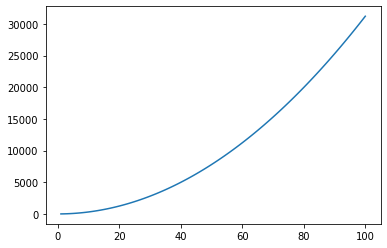

In [119]:
rArray = np.linspace(1, 100, 100)           # Defines arbitrary range of array for test values to plot
areaVect = np.vectorize(area)
yValues = areaVect(r = rArray)
plt.plot(rArray, yValues)

def bestFit(x, a, b):
    return a*np.power(x, b)

params, notimportantvar = curve_fit(bestFit, rArray, yValues)
a, b = params
print("Line of best fit: ", a, " * r ^ ", b) # Close to recovering pi * r ^ 2; increasing sample size would increase accuracy

5. (optional) Try to solve the same problem using the Monte Carlo method instead of the Riemann sums.